Make the necessary imports:

In [1]:
%matplotlib inline

In [29]:
import pandas as np
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

List the logical devices. For Mnist CPU is enough

In [5]:
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

MNIST check:

In [ ]:
mnist.load_data()[0]

In [8]:
len(mnist.load_data())

2

Split the dataset:


In [9]:
(attributes_train, labels_train), (attributes_test, labels_test) =mnist.load_data()

In [10]:
attributes_train[0].shape

(28, 28)

In [14]:
print(f'Train data contains {attributes_train.shape[0]} images with size {attributes_train.shape[1]} x {attributes_train.shape[2]}.')

Train data contains 60000 images with size 28 x 28.


Show first 10 images from the dataset:


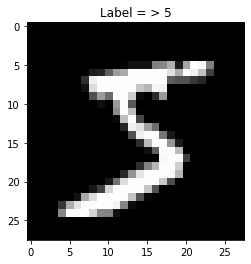

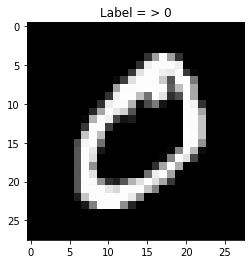

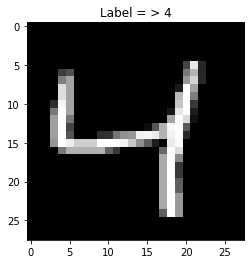

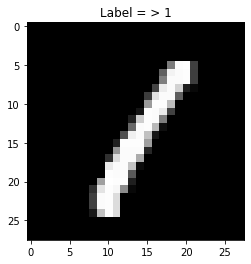

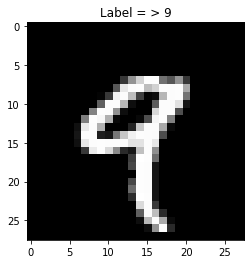

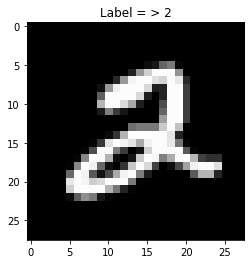

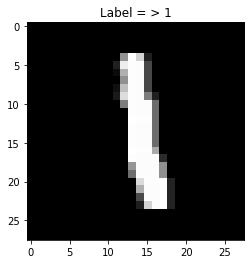

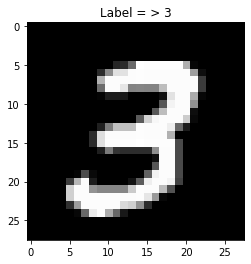

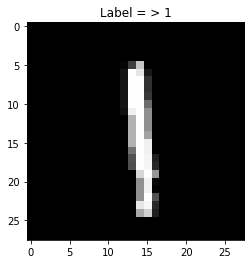

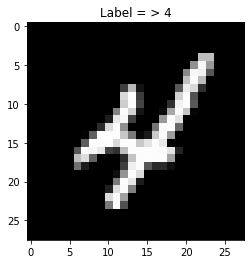

In [17]:
for i in range(10):
    plt.imshow(attributes_train[i], cmap='gray')
    plt.title(f'Label = > {labels_train[i]}')
    plt.show()
    

Very important scaling the data:

In [18]:
attributes_train = attributes_train / 255.0
attributes_test = attributes_test /255.0

In [21]:
attributes_test.min(), attributes_test.max()


(0.0, 1.0)

Creating a validation dataset:

In [22]:
attributes_test.shape

(10000, 28, 28)

In [24]:
attributes_validation, labels_validation = attributes_test[:3000], labels_test[:3000]
attributes_test,labels_test = attributes_test[3000:], labels_test[3000:]

In [26]:
attributes_validation.shape, labels_validation.shape

((3000, 28, 28), (3000,))

Preparing the model

Each time you run the model is saved in the memory , it is better to clear the session in case it will be run a couple of times

In [58]:
tf.keras.backend.clear_session()

Build the model:

In [59]:
model = Sequential([
    Input(shape = (28,28)),
    Flatten(),
    Dense(64 , activation = "relu"),
  
    Dense(32,  activation = "relu"),
  
    Dense(16,  activation = "relu"),
  
    Dense(10,  activation = "softmax")
])

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics = ["accuracy"]
    )

In [62]:
model.fit(
    attributes_train,
    labels_train,
    validation_data =(attributes_validation, labels_validation),
    epochs=50, 
#     callbacks=[TensorBoard(log_dir="./logs_val")]
)

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3337 - accuracy: 0.9004 - val_loss: 0.2039 - val_accuracy: 0.9363
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1383 - accuracy: 0.9583 - val_loss: 0.1459 - val_accuracy: 0.9527
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1015 - accuracy: 0.9696 - val_loss: 0.1321 - val_accuracy: 0.9590
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0823 - accuracy: 0.9745 - val_loss: 0.1312 - val_accuracy: 0.9570
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0677 - accuracy: 0.9791 - val_loss: 0.1181 - val_accuracy: 0.9643
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0587 - accuracy: 0.9817 - val_loss: 0.1173 - val_accuracy: 0.9630
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0533 - accuracy: 0.9830 - val_loss: 0.1270 - val_accuracy:

In [83]:
predictions=model.predict(attributes_test)

In [65]:
predictions[0]

array([3.6861658e-18, 2.6245009e-20, 6.4691901e-21, 9.1483793e-16,
       3.3092578e-15, 4.1363166e-11, 1.0000000e+00, 5.6154959e-20,
       7.5840133e-12, 1.5448474e-15], dtype=float32)

In [90]:
answer_label=predictions.argmax(axis=1)

In [91]:
predictions.shape

(7000, 10)

In [97]:
answer_label

array([6, 9, 8, ..., 4, 5, 6], dtype=int64)

In [93]:
len(answer_label)

7000

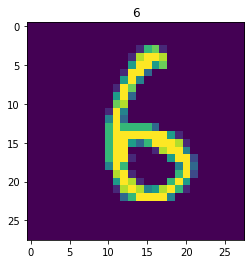

In [94]:
plt.imshow(attributes_test[0])
plt.title(answer_label[0])
plt.show()

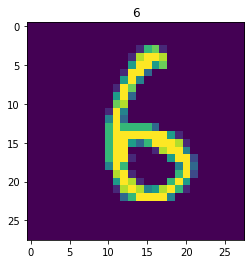

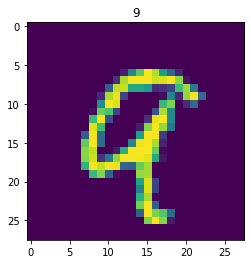

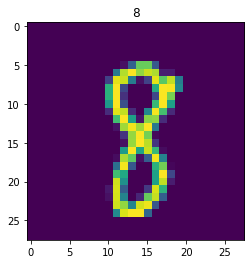

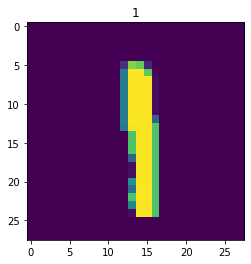

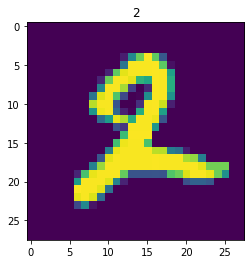

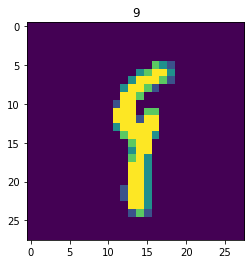

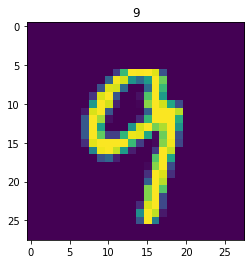

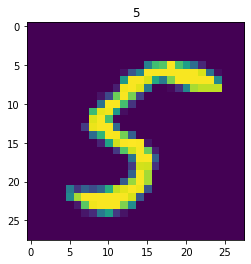

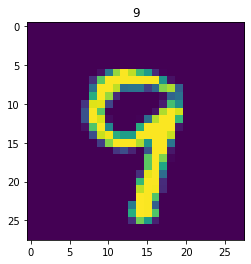

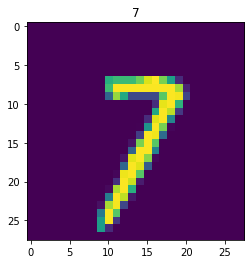

In [95]:
for i in range(10):
    plt.imshow(attributes_test[i])
    plt.title(answer_label[i])
    plt.show()